# Sentiment Analysis of Silverlake Ramen Yelp Reviews

## From fillings, to text, to feelings!

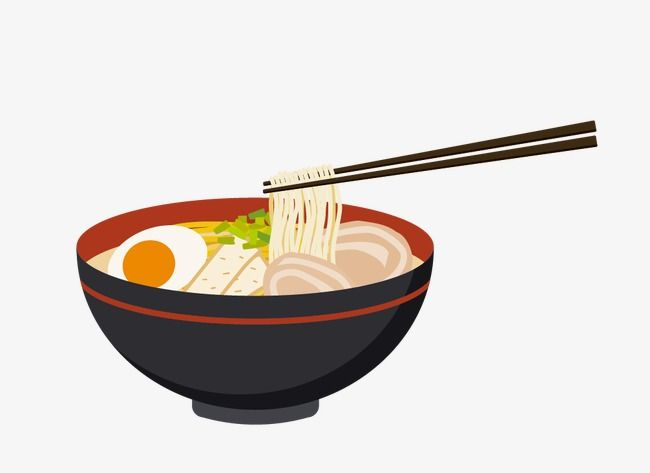

## Description

 Learning to scrape data has opened numerous doors for me. As a yelp user I am curious to see how my local ramen joint was doing. In this project I explore reviews and see how they translate into feelings using sentiment analysis. 
 *This project is aimed at gaining insights from a analytics standpoint and not a machine learning or predictive one.

### Some questions in mind

- **Besides "ramen", what other words come up most often?**
- **What are the reviews saying in terms of sentiment?**
- **From these reviews, what does positive vs negative sentiment look like?**
- **Are there any combinations of words that stand out?**
how many actually updating rewviews?
words from ubereats, review, quarantine?



 

### 1. Setting up our workstation and loading in libraries

   __Before we begin lets load in the relevant packages__

In [1]:

library(tidytext)
library(tidyverse)
library(dplyr)
library(rvest)
library(ggplot2)
library(tidyr)
library(stringr)
library(wordcloud)
library(tibble)
library(tm)


Warning message:
"package 'tidytext' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RC

### 2. Retrieving our data from our console (post web scraping)


In [2]:
# We read the dataset from github and set stringsAsfactors = FALSE so our dataset is in character type 
yelp <- read.csv("https://raw.githubusercontent.com/Rlegaspi562/Visualization-of-Sentiment-Analysis-of-Yelp-reviews/master/silverlakeramenyelp_dataset.csv", stringsAsFactors = FALSE, header = TRUE)

# Checking data
str(yelp)
head(yelp)

'data.frame':	315 obs. of  1 variable:
 $ Reviews: chr  "Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more." "Start your review of Silverlake Ramen." "I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always sl"| __truncated__ "I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only o"| __truncated__ ...


Reviews
"Your trust is our top concern, so businesses can't pay to alter or remove their reviews. Learn more."
Start your review of Silverlake Ramen.
I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.
"I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Â Needless to say, I'll definitely be back."
"Hi Bianca, Iâ€™m thrilled to see that you enjoyed your meal. Â Take care!"
"I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up."


### 3. Data wrangling and text preprocessing using tidy principles: Entering the Tidyverse

Before reformatting our data to fit tidy principles for ease of workflow I will also be ommitting some rows in the original dataset. After reading the yelp data and due to the webscraping process, I notice that some observations are actually business owner replies and are being counted as additional observations themselves. Fortunately, since the dataset is fairly manageable I can go through and remove business owner replies and other text which are not actually reviews as well as duplicates.

In [3]:
# Removing business owner replies, yelp headings
yelp <- yelp[ -c(1, 2, 5, 7, 10, 23, 28, 29, 37, 40, 47, 56, 72, 79, 80, 93, 102, 103, 121, 126, 127, 128, 131, 151, 152, 162, 174, 175, 176, 193, 198, 199, 200, 219, 222, 223, 237, 246, 247, 268, 269, 283, 285, 292, 293, 304, 311) , ]

In [7]:

# Turning yelp data into a tibble format
yelp_tibble <- as_tibble(yelp)


# Checking class to confirm
class(yelp_tibble)
str(yelp_tibble)

# Removing duplicate rows 
yelp_tibble %>% distinct(value, .keep_all = TRUE)

# Checking incase any duplicates still remain
duplicated(yelp_tibble)

# Print
glimpse(yelp_tibble)

[1] "tbl_df"     "tbl"        "data.frame"

Classes 'tbl_df', 'tbl' and 'data.frame':	268 obs. of  1 variable:
 $ value: chr  "I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always sl"| __truncated__ "I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only o"| __truncated__ "I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. "| __truncated__ "Eh, it's ok if you're craving ramen but feeling too lazy to drive to Irvine or Torrance for proper ramen.Ordere"| __truncated__ ...


value
I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.
"I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Â Needless to say, I'll definitely be back."
"I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up."
"Eh, it's ok if you're craving ramen but feeling too lazy to drive to Irvine or Torrance for proper ramen.Ordered The Blaze, spicy with pork. Wow, it came out in a comically huge bowl. Looks like a giant lake of broth with a little island in the middle made of noodles and spinach. The presentation just looks sparse and weird. Speaking of weird, the spinach was unexpected. I can't recall ever seeing spinach at any other ramen place. It just didn't add anything to the dish. Just a soggy green thing floating in your bowl. And there was one piece of sea weed clinging to the side of the bowl, far away from the noodle island. Again, strange sparse presentation. The noodles were average. The pork was super tender and was braised or blow torched to give it a slight crust. The broth was ""ok"" at first. But towards the end, I grabbed a spoon and slurped it up. I noticed a strange aftertaste. Not very pleasant. Also ordered the chicken karaage bowl. When it arrived at my table, it was covered in so many things. Again, not what you'd find at a traditional ramen place. I'll admit the actual chicken was great. Meat was tender and had the right deep fried crispiness. But the rock-n-roll mayo and terriyaki sauce ruined it. I highly suggest ordering it with sauces on the side. Also comes with a shredded pickled daikon as a garnish. It's really tangy. I don't hate it, but I could do without it.So now let's talk about the weird workflow. You walk in. You see one person at the register, and you see these giant tablets on the wall where you can self-order and pay with card. You ask yourself.. if you know what you want and you want to pay by card, do you cut ahead of everyone else in the line and punch in your order? Or do you wait in line and wait til you're face to face to the tablet? Well, I observed people doing both. I saw some confusing faces, as well as angry faces from people waiting in line. This is just a terrible idea, especially since not everyone was eager to use the giant tablet, even though they were paying by card at the register.Next, after you order and pay, you wait for someone to seat you. During peak hours, this is even more terrible idea. Because sometimes people eat slow and it takes a while for an empty table to come up. But since you've already paid, you're stuck. You can't just bounce to some other places to eat if the wait is too long.Prices are on par with other ramen places. If you think it's expensive, then you need to stick to the 25 cent Top Ramen you get at the store. I think karaage bowl is a great deal. You get a good amount of chicken and rice for the price. It's a meal in itself.Overall, not a bad place but not my first first choice either. I might go back and try their other items. But I wasn't impressed with their Blaze ramen and the weird workflow."
"Very hip, very modern, very cool. I like it. The menu has a great mix of fresh, fried, and flavorful soup options. My guy had the more lighter broth ramen made with chicken, I had the ground chicken

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE

Observations: 268
Variables: 1
$ value <chr> "I have been here at least 3 times to dine in person. Hospita...


In [8]:
# Renaming value back to Reviews as variable name
yelp_tibble <- yelp_tibble %>% rename(Reviews = value)
colnames(yelp_tibble)

#tokenization (unnesting) in preparation for sentiment analysis (inner_join) to transform nontidy text data into tidy text data
tidy_yelp <- yelp_tibble %>%
  unnest_tokens(word, Reviews)

#removing stopwords from our tidy_yelp dataset that are extremely common e.g. is, of, a, etc...
data("stop_words")
tidy_yelp <- tidy_yelp %>%
  anti_join(stop_words) 

#checking
tidy_yelp


[1] "Reviews"

Joining, by = "word"


word
3
times
dine
person
hospitality
excellent
service
slow
packed
arrive


In [9]:
#Our 3 types of data. Just in different formats!

# 1. Our raw data  
head(yelp)

# 2. Our tibble data
head(yelp_tibble)

# 3. Our tidy data
head(tidy_yelp)

[1] "I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
[2] "I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Â Needless to say, I'll definitely be back."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Reviews
I have been here at least 3 times to dine in person. Hospitality was always excellent but service was always slow since they are always so packed. Either arrive before the rush or order take out.
"I ordered togo from this Silverlake Ramen at LBX yesterday, 5/5/2020. (Cant help but wonder if I was the only one in long beach eating ramen on cinco de mayo ) but anyways, I ordered then basic tonkotsu ramen and I was immediately impressed. The soup of the ramen was subtle and flavorful. Not at all salty or oily. The veggies tasted delightfully fresh and the noodles tasted as tho they were cut and boiled to perfection. The piece of chasu on top was melt in your delicious. On a separate occasion, I ordered the pork bun. It was massive and delicious as well! Â Needless to say, I'll definitely be back."
"I have been here twice in the last two weeks and it is yummy. Great service and awesome food and high quality. My family and I love Silverlake Ramen, double thumbs up."
"Eh, it's ok if you're craving ramen but feeling too lazy to drive to Irvine or Torrance for proper ramen.Ordered The Blaze, spicy with pork. Wow, it came out in a comically huge bowl. Looks like a giant lake of broth with a little island in the middle made of noodles and spinach. The presentation just looks sparse and weird. Speaking of weird, the spinach was unexpected. I can't recall ever seeing spinach at any other ramen place. It just didn't add anything to the dish. Just a soggy green thing floating in your bowl. And there was one piece of sea weed clinging to the side of the bowl, far away from the noodle island. Again, strange sparse presentation. The noodles were average. The pork was super tender and was braised or blow torched to give it a slight crust. The broth was ""ok"" at first. But towards the end, I grabbed a spoon and slurped it up. I noticed a strange aftertaste. Not very pleasant. Also ordered the chicken karaage bowl. When it arrived at my table, it was covered in so many things. Again, not what you'd find at a traditional ramen place. I'll admit the actual chicken was great. Meat was tender and had the right deep fried crispiness. But the rock-n-roll mayo and terriyaki sauce ruined it. I highly suggest ordering it with sauces on the side. Also comes with a shredded pickled daikon as a garnish. It's really tangy. I don't hate it, but I could do without it.So now let's talk about the weird workflow. You walk in. You see one person at the register, and you see these giant tablets on the wall where you can self-order and pay with card. You ask yourself.. if you know what you want and you want to pay by card, do you cut ahead of everyone else in the line and punch in your order? Or do you wait in line and wait til you're face to face to the tablet? Well, I observed people doing both. I saw some confusing faces, as well as angry faces from people waiting in line. This is just a terrible idea, especially since not everyone was eager to use the giant tablet, even though they were paying by card at the register.Next, after you order and pay, you wait for someone to seat you. During peak hours, this is even more terrible idea. Because sometimes people eat slow and it takes a while for an empty table to come up. But since you've already paid, you're stuck. You can't just bounce to some other places to eat if the wait is too long.Prices are on par with other ramen places. If you think it's expensive, then you need to stick to the 25 cent Top Ramen you get at the store. I think karaage bowl is a great deal. You get a good amount of chicken and rice for the price. It's a meal in itself.Overall, not a bad place but not my first first choice either. I might go back and try their other items. But I wasn't impressed with their Blaze ramen and the weird workflow."
"Very hip, very modern, very cool. I like it. The menu has a great mix of fresh, fried, and flavorful soup options. My guy had the more lighter broth ramen made with chicken, I had the ground chick

word
3
times
dine
person
hospitality
excellent


In [15]:


#DELETE THIS AND FIND A WAY TO OMIT â from result(count)



# Removing special characters
tidy_yelp<- lapply(tidy_yelp, gsub, pattern=c("â"), replacement="")
tidy_yelp<- lapply(tidy_yelp, gsub, pattern=c("Â"), replacement="")
tidy_yelp<- as_tibble(tidy_yelp)


## Output & Visualizations

### 1.  Most Common Words

In the stacked bar chart below, we see

In [16]:

 #Output
tidy_yelp %>% 
  count(word, sort = TRUE)

word,n
ramen,513
,165
broth,159
pork,153
food,141
service,115
chicken,101
time,85
spicy,84
silverlake,81


In [ ]:
 #Visual
tidy_yelp %>% 
  count(word, sort = TRUE) %>%
  filter(n > 50) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y =n, color = word)) +
  geom_col() +
  xlab(NULL) +
  theme(legend.position="none") +
  coord_flip() 

### 2.  Positive vs Negative Sentiment 

In [ ]:
silverlake_bing_sentiment <- tidy_yelp %>%
  inner_join(get_sentiments("bing")) %>% #sentiment analysis implemented


#output
silverlake_bing_sentiment

In [ ]:
#visual
silverlake_bing_sentiment_bar <- silverlake_bing_sentiment %>% 
  count(sentiment) %>%
  # Use aes() to put words on the x-axis and n on the y-axis
  ggplot(aes(x = sentiment, y = n, fill = sentiment)) +
  # Make a bar chart with geom_col()
  geom_col(show.legend = FALSE) +
  xlab("Sentiment") +
  ylab("Frequency") +
  ggtitle("Frequency of Positive and Negative Sentiment") +
  geom_text(aes(label = n), position = position_dodge(width = 0.9), vjust = -0.25)
silverlake_bing_sentiment_bar